# TODO:
- Add something to add a minimap to the delta_twtt plot to show one point in the general area of the crossover points for quick reference
    - or add a plot to the side which displays the continent and a "you are here" star marker IVO the crossover points
- **Implement multi flight crossover point finding**
- Multi flight plotting
    - how many flights could I put in a file together? i.e. can I save a full season to one file in the pickle format?
- scaling for overall depth in twtt? i.e. less effect in shallower ice so you can't really compare to deeper ice CX points



In [1]:
import math

import matplotlib.pyplot as plt
from project_classes import *
from functions import *
# from scipy.optimize import curve_fit
# import scipy.optimize as opt

In [2]:
zoom = True
seg_length = 100
# season = "2009_Antarctica_DC8"
season = "2018_Antarctica_DC8" 
season = "2016_Antarctica_DC8" 
# season = "2014_Antarctica_DC8" 
season = "2022_Antarctica_BaslerMKB"

# flight = "20181030_01"  # the flight date and frame number 
    # that flight only has one point
# flight = "20181018_01"
# flight = "20181103_01"
# flight = "20181011_01"
    # one dimensional data error
    # TODO: figure out why 10018 and 1103 have the same data or at least print the same maps and plots
# flight = "20181109_01"
# flight = "20181112_02"  # the problem flight
    # plots fake crossovers along the curved path
flight = "20161024_05"
# flight = "20161111_05"
    # probably too close to the coast to be useful
# flight = "20161024_05"
# flight = "20141026_06"
    # this one is 1/3 of an orbit and produces a bunch of bunk crossovers
# flight = "20230127_01"
    # ~ 1/3 of an orbit of the pole and yet the angle plot looks like hot garbage
flight = "20230108_01"
flight = "20221212_01"
flight = "20221228_01"

# file_name = "layer_export_" + flight + ".pickle"
dir = "C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\layer_export_"
file_name = dir + flight + ".pickle"
testing = False

In [3]:
"""
read in the layers from the layer files and save them to a pickle file
"""
force = False
# force = True
whole_season = False
whole_season = True

if whole_season:
    print(type(dir))
    file_name = dir + season + ".pickle"
    # print(f"filename: {filename}")
    if not os.path.isfile(file_name):  # if the file does not exist
        debug_print(BRIGHT_RED, f"File {file_name} does not exist. You should make it...")
    else:
        layers = read_layers(file_name)
        print(f"File {file_name} loaded.")
else:
    if not force:
        if not os.path.isfile(file_name):  # if the file does not exist
            print(f"File {file_name} does not exist. Making it...")
            mat_pickler_h5py(season, flight, testing_mode=testing)  # make it
            layers = read_layers(file_name)  # read in the layers from the pickle file
            print(f"File {file_name} created.")
        else:
            layers = read_layers(file_name)  # read in the layers from the pickle file
            print(f"File {file_name} loaded.")
    else:
        mat_pickler_h5py(season, flight, testing_mode=testing)  # make it
        layers = read_layers(file_name)  # read in the layers from the pickle file

<class 'str'>
Reading pickle file...
--------------------
Surface
Bottom
--------------------

File C:\Users\rj\Documents\cresis_project\pickle_jar\layer_export_2022_Antarctica_BaslerMKB.pickle loaded.


### read in the iceflow data from the iceflow data files and save them to a pickle file

In [4]:
if not os.path.isfile("C:\\Users\\rj\\Documents\\cresis_project\\iceflow\\iceflow_data.pickle"):  # if the file does not exist
    print("The iceflow data pickle file was not found. Creating a new one...")
    filename = iceflow_saver()
    iceflow_data = iceflow_loader(filename)
    print("The iceflow data pickle file was successfully created.")
# try:
iceflow_data = iceflow_loader("C:\\Users\\rj\\Documents\\cresis_project\\iceflow\\iceflow_data.pickle")
print("The iceflow data pickle file was found and loaded.")

x = iceflow_data[0]
y = iceflow_data[1]
velocity_x = iceflow_data[2]
velocity_y = iceflow_data[3]
latitude = iceflow_data[4]
longitude = iceflow_data[5]
print("iceflow data loaded")

The iceflow data pickle file was found and loaded.
iceflow data loaded


In [5]:
# if the file at filename exists, read in the intersect_indices and intersection_points from the pickle file
# otherwise, find the intersect_indices and intersection_points and save them to a pickle file
force_redo_intersections = False
filename = f"C:\\Users\\rj\\Documents\\cresis_project\\pickle_jar\\{season}_{flight}_crossover_points.pickle"
if not os.path.isfile(filename) or force_redo_intersections:  # if the file does not exist
    print(f"File {filename} does not exist. Making it...")
    intersection_points, intersection_indices, segment_ends = cross_point(layers[0], seg_length, quiet=True)
    with open(filename, 'wb') as file:
        pickle.dump(intersection_indices, file)
        pickle.dump(intersection_points, file)
        pickle.dump(segment_ends, file)
    print(f"intersection_indices and intersection_points saved to {filename}")
else:
    with open(filename, 'rb') as file:
        intersection_indices = pickle.load(file)
        intersection_points = pickle.load(file)
        segment_ends = pickle.load(file)
    print(f"intersection_indices and intersection_points loaded from {filename}")

intersection_indices and intersection_points loaded from C:\Users\rj\Documents\cresis_project\pickle_jar\2022_Antarctica_BaslerMKB_20221228_01_crossover_points.pickle


In [6]:
""" Current Project 30Jan24 """
# TODO: deconstruct the nested lists and make them make more sense
    # put them in class objects

' Current Project 30Jan24 '

In [7]:
# TODO: identify why this is still here and not in the functions file
    # because it is still being tweaked
# TODO: consider normalizing to the elevation, not the surface
    # i.e. instead of having the surface be flat, have it represent the actual topology
    # really only useful for places where the surface is not basically flat 
def plot_layers_at_cross(layers, intersection_indices, intersection_points, zoom=False, refractive_index=1.77, cross_index=0, filename=None):
    """
    :param layers: a list of Layer objects
    :param intersection_indices: a list of indices in the lat-lon arrays where the flight path
    crosses over itself
    :param intersection_points: a list of lat-lon points where the flight path crosses over itself
    :return: nothing (plots the layers and the map)
    """
    plt.figure(figsize=(16, 8), layout='constrained')
    # print("Plotting layers...")
    # print("--------------------")
    # print("Adjusting for surface twtt...")
    for layer in layers:
        corrected_layer = layer.twtt - layers[0].twtt
        layer.twtt_corrected = corrected_layer


    # ax2 will be the layer plot
    # plt.subplot(1, 2, 1)

    # plot the layer depths vs index for 500 points before and after the first
    # crossover point for each layer.
    # also plot the layer depths vs index for 500 points before and after the
    # second crossover point for each layer.
    offset = 500
    # plot the corrected twtt for each layer
    plt.plot(
        layers[0].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[0].layer_name)
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][0] - offset:intersection_indices[cross_index][0] + offset],
        label=layers[1].layer_name + ' segment 1')
    plt.plot(
        layers[1].twtt_corrected[intersection_indices[0][1] - offset:intersection_indices[cross_index][1] + offset],
        label=layers[1].layer_name + ' segment 2')

    # invert the y-axis because the twtt increases with depth
    plt.gca().invert_yaxis()
    # plot the crossover point on the plot
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][0], color='red',
                label='X Point 1')
    plt.scatter(offset, twtt_at_point(layers[1], layers[0],
                                      intersection_indices, quiet=True)[0][1], color='green',
                label='X Point 2')
    
    # print the twtt at the crossover point on both segments
    twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)[0]
    # print(f"twtt: {twtt}")
    
    
    # plot a line at the crossover point
    plt.axvline(x=offset, color='black', label='X Point', linestyle='--', linewidth=0.3)

    # set the y axis to be in microseconds instead of seconds
    plt.ylabel(f"Adjusted Two Way Travel Time ({chr(956)}s)")
    plt.xlabel("Index")

    # force the y values to be displayed in 1e-6 ticks (microseconds) instead of 1e-5 ticks (tens of microseconds)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)

    def s_to_ms(x, pos):
        """
        :param x: the x value
        :param pos: the position
        :return: the x value in milliseconds
        """
        return '%1.1f' % (x * 1e6)

    # set the y axis to be in microseconds instead of seconds
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(s_to_ms))
    plt.legend( fontsize='smaller', loc='upper right', bbox_to_anchor=(1, 0.9))

    # make the right side y axis show the depth in meters by converting the twtt to depth using the refractive index
    min_y, max_y = plt.ylim()
    n = refractive_index
    c = 299792458  # m/s
    v = c / n
    # depth = twtt * v / 2
    scale_factor = v / 2
    print(f"scale factor: {scale_factor}")
    plt.twinx()
    plt.ylim(min_y * scale_factor, max_y * scale_factor)
    plt.ylabel("Depth (m)")

    # make the top of the x axis be the distance in meters by converting the lat-lon to distance using the haversine formula
    min_x, max_x = plt.xlim()
    scale_factor = latlon_dist((layers[0].lat[0], layers[0].lon[0]), (layers[0].lat[1], layers[0].lon[1]))
    # print(f"scale factor: {scale_factor}")
    plt.twiny()
    plt.xlim(min_x * scale_factor, max_x * scale_factor)
    plt.xlabel("Distance (m)")

    plt.title("Adjusted Two Way Travel Time vs Index")
    plt.show()


def plot_map(layers, intersection_indices, intersection_points, iceflow_data, season, flight,  zoom=False, cross_index=0, filename=None):
    """
    plot the map
    """
    plot_it = True
    printout = False
    
    if plot_it:
        plt.figure(figsize=(16, 8), layout='constrained')
    print("Plotting map...")
    # TODO: add an offset to the zoom settings so that the crossover point is in the center of the zoomed in map
    offset = 500  # this is not that offset

    # this code sets up a polar stereographic map of antarctica with the South Pole in the center
    zoom_out_to_continent = not zoom
    if zoom_out_to_continent:
        llcrnrx = -400000
        llcrnry = -400000
        urcrnrx = 250000
        urcrnry = 250000
    else:
        llcrnrx = -100000
        llcrnry = -100000
        urcrnrx = 100000
        urcrnry = 100000
    lat_0 = intersection_points[cross_index][0]
    lon_0 = intersection_points[cross_index][1]
    # print(f"debug: lat_0: {lat_0}, lon_0: {lon_0}")
    if plot_it:
        # m = Basemap(projection='ortho', lat_0=lat_0, lon_0=lon_0, llcrnrx=llcrnrx,
        #             llcrnry=llcrnry, urcrnrx=urcrnrx, urcrnry=urcrnry, resolution='h')
        m = Basemap(projection='spstere', lat_0=-90, lat_ts=-71, lon_0=0, boundinglat=-80, resolution='c')
        m.drawcoastlines()
        m.fillcontinents(color='grey', lake_color='aqua')
        m.drawparallels(np.arange(-80., 81., 20.))
        m.drawmeridians(np.arange(-180., 181., 20.))
        m.drawmapboundary(fill_color='aqua')
    
        # plot the flight path
        m.plot(layers[0].lon, layers[0].lat, latlon=True, color='lightgreen', linewidth=1)
        # plot the section of the flight path in the plot above
        m.plot(layers[0].lon[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset],
               layers[0].lat[intersection_indices[0][0] - offset:intersection_indices[0][0] + offset], latlon=True,
               color='red', linewidth=1)
        m.plot(layers[0].lon[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset],
               layers[0].lat[intersection_indices[0][1] - offset:intersection_indices[0][1] + offset], latlon=True,
               color='green', linewidth=1)
        # plot labels for the flight paths at their start points
        plt.text(
            m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[0],
            m(layers[0].lon[intersection_indices[0][0] - offset], layers[0].lat[intersection_indices[0][0] - offset])[1],
            '\nsegment 1', fontsize='smaller', fontweight='bold', ha='right', va='top', color='red')
        plt.text(
            m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[0],
            m(layers[0].lon[intersection_indices[0][1] - offset], layers[0].lat[intersection_indices[0][1] - offset])[1],
            '\nsegment 2', fontsize='smaller', fontweight='bold', ha='left', va='top', color='green')
        # plot the South Pole
        # m.scatter(0, -90, latlon=True, color='black', linewidth=1, label='South Pole')
        # plot the crossover points
        for point in intersection_points:
            m.scatter(point[1], point[0], latlon=True, color='darkred', linewidth=1, label='Crossover Point')
            plt.text(m(point[1], point[0])[0], m(point[1], point[0])[1] - 10000, f'{intersection_points.index(point) + 1}\n\n',
                     fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # m.scatter(intersection_points[cross_index][1], intersection_points[cross_index][0], latlon=True, color='darkred',
    #           linewidth=1, label='Crossover Point')
    # plt.text(m(intersection_points[cross_index][1], intersection_points[cross_index][0])[0],
    #          m(intersection_points[cross_index][1], intersection_points[cross_index][0])[1] - 10000,
    #          'Crossover Point\n\n',
    #          fontsize='smaller', fontweight='bold', ha='center', va='top', color='darkred')

    # plot the the ice flow direction at the crossover point
    for i in range(len(intersection_indices)):
    # for i in range(1):
        cross_lat = intersection_points[i][0]
        cross_lon = intersection_points[i][1]
        if cross_lon < 0:
            cross_lon = 360 + cross_lon
        cross_x, cross_y = latlon_to_xy(cross_lat, cross_lon)  
        """Outputs x and y in EPSG:3031"""
    

        
        # nearest_x_index, nearest_y_index = xy_to_nearest_unmasked_index(cross_x, cross_y, iceflow_data, max_radius=10)
        # nearest_y_index, nearest_x_index = latlon_to_nearest_unmasked_index(cross_lat, cross_lon, iceflow_data, max_radius=10)
        nearest_x_index, nearest_y_index = latlon_to_nearest_unmasked_index(cross_lat, cross_lon, iceflow_data, max_radius=10)
        
        """Outputs the nearest x and y indices to the x and y EPSG:3031 values"""
        
        
        nearest_lat = iceflow_data[4][nearest_y_index][nearest_x_index]  # latitude = iceflow_data[4]
        nearest_lon = iceflow_data[5][nearest_y_index][nearest_x_index]  # longitude = iceflow_data[5]
        # nearest_lon = - (iceflow_data[5][nearest_x_index][nearest_y_index] - 270)  # longitude = iceflow_data[5]
        
        # print(f"nearest_lat: {nearest_lat:.4f}, nearest_lon: {nearest_lon:.4f}")
        

        nearest_x, nearest_y = index_to_x(nearest_x_index), index_to_y(nearest_y_index)
        
    
        # flow = flow_at_x_y_index(nearest_x_index, nearest_y_index, iceflow_data)
        vx, vy = iceflow_data[2][nearest_y_index][nearest_x_index], iceflow_data[3][nearest_y_index][nearest_x_index]
        flow = [vx, vy]
        
        
        flow_heading = xyindex_vector_to_heading(nearest_x_index, nearest_y_index, flow[0], flow[1])[0]
        # m.quiver(intersection_points[0][1], intersection_points[0][0], 1000 * np.cos(np.radians(flow_heading)),
        #          1000 * np.sin(np.radians(flow_heading)), latlon=True, color='blue', label='Ice Flow Vector')
        # plot the ice flow vector in the upper right corner as a quiver
        

        if printout:
            print(f"cross index: {i+1}")
            print(f"cross_lat: {cross_lat:.8}, cross_lon: {cross_lon:.8f}") 
            print(f"cross_x: {cross_x:.4f}, cross_y: {cross_y:.4f}")
            print(f"nearest_x_index: {nearest_x_index}, nearest_y_index: {nearest_y_index}")
            print(f"nearest_lat: {nearest_lat}, nearest_lon: {nearest_lon}")
            print(f"nearest_x: {nearest_x:.4f}, nearest_y: {nearest_y:.4f}")
            print(f"flow at nearest: {flow}")
            print("")
            print(f"Diff x: {(cross_x - nearest_x):.1f}, Diff y: {(cross_y - nearest_y):.1f}")
            print("")
            print(section_break)
            print(section_break)
            print("")
        
        

        m.quiver(nearest_x, nearest_y, 10000 * np.cos(np.radians(flow_heading)), 10000 * np.sin(np.radians(flow_heading)), latlon=True, color='blue', label='Ice Flow Vector')
        x, y = m(0, -90)
    
        # plt.text(x, y, '\nSouth Pole', fontsize='smaller', fontweight='bold', ha='center', va='top', color='black')

    center_x, center_y = latlon_to_xy(intersection_points[cross_index][0], intersection_points[cross_index][1])
    center_x = x_to_index(center_x)
    center_y = y_to_index(center_y)
    search_range = 750
    steps = 50
    start_time = time.time()
    for x in range(-1 * search_range + center_x, search_range + center_x, steps):
        current = x + search_range - center_x    
        progress_bar(current,  2 * search_range, start_time)
        for y in range(-1 * search_range + center_y, search_range + center_y, steps):
            if not (
                np.ma.is_masked(iceflow_data[2][y][x]) and np.ma.is_masked(iceflow_data[3][y][x])
                ):
                # print(f"np.isnan(iceflow_data[2][y][x]): {np.isnan(iceflow_data[2][y][x])}")
                # print(f"np.isnan(iceflow_data[3][y][x]): {np.isnan(iceflow_data[3][y][x])}")
                # print(f"x-index: {x}, y-index: {y}\nx: {index_to_x(x)}, y: {index_to_y(y)}")
                vx = 1 * iceflow_data[2][y][x]
                vy = 1 * iceflow_data[3][y][x]
                flow = [vx, vy]
                flow_heading = xyindex_vector_to_heading(x, y, flow[0], flow[1])[0]
                # print(f"flow at nearest: {flow_heading}")
                scale = 0.0005
                mag = np.sqrt(vx**2 + vy**2) * scale
                lat = iceflow_data[4][y][x]
                lon = iceflow_data[5][y][x]
                # print(f"lat: {lat}, lon: {lon}")
                # print(f"flow at nearest: {flow}")
                m.scatter(lon, lat, latlon=True, color='darkred', s=0.75)
                # plot a line of length mag in the direction of the flow vector to show the flow vector
                endpt = [lon + mag * np.cos(np.radians(flow_heading)), lat + mag * np.sin(np.radians(flow_heading))]
                m.plot([lon, endpt[0]], [lat, endpt[1]], latlon=True, color='blue', linewidth=0.5)
                
            # else:
                # print(f"masked at x: {x}, y: {y}")
        # scatter the south pole
        # m.scatter(0, -90, latlon=True, color='white', s=5)
        print("")
        
    if plot_it: 
        plt.title("Lat-Lon Map")
        # set tight layout
        # plt.tight_layout()
    
        # save the plot
        if filename:
            # plt.savefig(f"{filename}.png", dpi=250)
            dir = "C:\\Users\\rj\Documents\\cresis_project\\screens\\"
            savename = f"{dir}{filename}_map.png"
            print(f"saving to {savename}...")
            plt.savefig(savename, dpi=150)
        
        print("drawing to screen...")
        plt.show()

    # print("plotted map")
    # print(section_break + "\n")

Plotting map...
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to s

C:\Users\rj\Documents\cresis_project\venv\lib\site-packages\pyproj\transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
C:\Users\rj\Documents\cresis_project\venv\lib\site-packages\pyproj\utils.py:83: UserWarning: Warning: converting a masked element to nan.
  return array("d", (float(xxx),)), DataType.FLOAT


The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calculated indices are unmasked, no need to search
The calcul

C:\Users\rj\Documents\cresis_project\venv\lib\site-packages\matplotlib\quiver.py:627: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
C:\Users\rj\Documents\cresis_project\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


drawing to screen...


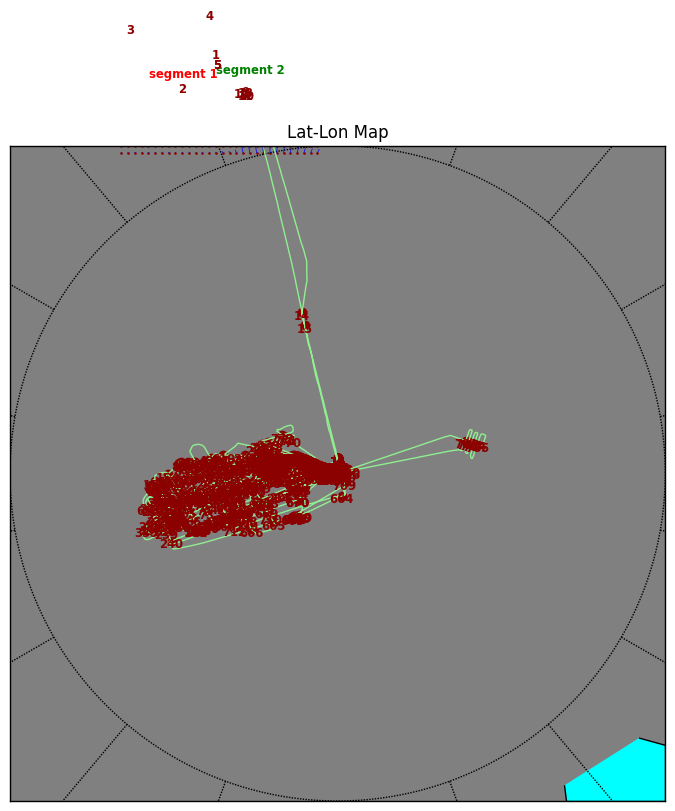

In [8]:
# print(segment_ends[0][0][0][0])
# for point in intersection_points:
    # print(point[0])
# plot_layers_at_cross(layers, intersection_indices, segment_ends)
# plot_layers_at_cross(layers, intersection_indices, intersection_points, zoom=zoom, cross_index=0, filename=(season + flight + "crossover"))
plot_map(layers, intersection_indices, intersection_points, iceflow_data, season, flight,  zoom=False, cross_index=0, filename=(season + flight + "crossover")) 

In [9]:
for layer in layers:
        corrected_twtt = layer.twtt - layers[0].twtt  # normalize against the surface layer
        # corrected_twtt = layer.twtt
        layer.twtt_corrected = corrected_twtt

In [10]:
for i in range(len(segment_ends)):
    print(f"corrected_twtt[segment_ends[{i}][0][2]]: \t\t{corrected_twtt[segment_ends[i][0][2]]}")
    print(f"corrected_twtt[segment_ends[{i}][1][2]]: \t\t{corrected_twtt[segment_ends[i][1][2]]}")
    delta = corrected_twtt[segment_ends[i][1][2]] - corrected_twtt[segment_ends[i][0][2]]
    print(f"delta: \t{delta}")
    print(f"depth: \t{twtt_to_depth(delta, refractive_index=1.77)}")
    print(section_break)


corrected_twtt[segment_ends[0][0][2]]: 		0.0
corrected_twtt[segment_ends[0][1][2]]: 		0.0
delta: 	0.0
depth: 	0.0
--------------------
corrected_twtt[segment_ends[1][0][2]]: 		5.735082690169722e-06
corrected_twtt[segment_ends[1][1][2]]: 		5.941097254042423e-06
delta: 	2.0601456387270123e-07
depth: 	17.446783188473194
--------------------
corrected_twtt[segment_ends[2][0][2]]: 		2.3424335994639173e-05
corrected_twtt[segment_ends[2][1][2]]: 		2.3703185468573435e-05
delta: 	2.788494739342621e-07
depth: 	23.61496305162694
--------------------
corrected_twtt[segment_ends[3][0][2]]: 		2.227098666967853e-06
corrected_twtt[segment_ends[3][1][2]]: 		2.238038279820868e-06
delta: 	1.0939612853014998e-08
depth: 	0.926444470840045
--------------------
corrected_twtt[segment_ends[4][0][2]]: 		nan
corrected_twtt[segment_ends[4][1][2]]: 		nan
delta: 	nan
depth: 	nan
--------------------
corrected_twtt[segment_ends[5][0][2]]: 		nan
corrected_twtt[segment_ends[5][1][2]]: 		nan
delta: 	nan
depth: 	nan
--

In [11]:
class Cross:
    def __init__(self):
        self.flow_xy = None
        self.flow_v = None

        self.flow_heading_full = None
        self.flow_heading = None
        self.plane_heading_1 = None
        self.plane_heading_2 = None
        self.angle = None
        self.twtt = None
        self.delta_twtt = None
        self.depth1 = None
        self.depth2 = None
        self.depth_ave = None
    

    def to_dict(self):
        return {
            'flow_xy': self.flow_xy,
            'flow_heading_full': self.flow_heading_full,
            'flow_heading': self.flow_heading,
            'plane_heading_1': self.plane_heading_1,
            'plane_heading_2': self.plane_heading_2,
            'angle': self.angle,
            'twtt': self.twtt,
            'delta_twtt': self.delta_twtt,
            'depth1': self.depth1,
            'depth2': self.depth2,
            'depth_ave': self.depth_ave
        }

    
    def any_nans(self):
        for key, value in self.to_dict().items():
            if value is np.nan:
                return True
        return False
          
          
    def to_dict(self):
        return self.__dict__

    def __str__(self):
        attributes = self.to_dict()
        str_repr = '\n'.join(f"{key}: {value}" for key, value in attributes.items())
        return str_repr
    
    # def __str__(self):
    #     str = f"flow_xy: {self.flow_xy}\n" \
    #           f"flow_heading_full: {self.flow_heading_full}\n" \
    #           f"flow_heading: {self.flow_heading}\n" \
    #           f"plane_heading_1: {self.plane_heading_1}\n" \
    #           f"plane_heading_2: {self.plane_heading_2}\n" \
    #           f"angle: {self.angle}\n" \
    #           f"twtt: {self.twtt}\n" \
    #           f"delta_twtt: {self.delta_twtt}\n" \
    #           f"depth1: {self.depth1}\n" \
    #           f"depth2: {self.depth2}\n" \
    #           f"depth_ave: {self.depth_ave}"
    #     return str


# TODO: 1July24 x and y are still mixed up here from how they are used below
- go line by line and verify against QGIS for every function and function call starting from the top.
    - transpose the matrix in flow_data_file_loader() and call it good?

In [21]:
def latlon_to_nearest_unmasked_index(lat, lon, iceflow_data, max_radius=10, printout=False):
    """
    Find the nearest x and y value in the iceflow data to an input x and y value.
    :param x: the x value to find the nearest x value to
    :param y: the y value to find the nearest y value to
    :param iceflow_data: the iceflow data
    :param max_radius: the maximum radius to search for an unmasked point
    :param printout: whether or not to print the nearest unmasked point
    :return: the nearest unmasked x and y indices in the iceflow data to an input x and y value
    """
    x, y = latlon_to_xy(lat, lon)  # convert the x value to an index
    y_index = x_to_index(x)  # convert the x value to an index
    y_index = y_to_index(y)  # convert the y value to an index
    # print(f"checking indices: {x_index, y_index}")
        # x,y → indices
    # if the calculated indices are valid, return them. If they are masked, procede down the search function.
    if (
            not np.ma.is_masked(iceflow_data[2][x_index][y_index])  # if the x velocity is unmasked
            and not np.ma.is_masked(iceflow_data[3][x_index][y_index])  # if the y velocity is unmasked
        ):
        print("The calculated indices are unmasked, no need to search")
        print(f"values: {iceflow_data[2][x_index][y_index], iceflow_data[3][x_index][y_index]}")
        print(f"at indices {x_index, y_index}")
        return x_index, y_index

    unmasked = []  # a list to store the unmasked x and y values
    for x_index_iterator in range(x_index - max_radius, x_index + max_radius):  # iterate through the x indices within the max_radius
        for y_index_iterator in range(y_index - max_radius, y_index + max_radius):  # iterate through the y indices within the max_radius
            if (
                    0 <= x_index_iterator < iceflow_data[2].shape[0]  # if the x index is within the bounds of the iceflow data
                    and 0 <= y_index_iterator < iceflow_data[2].shape[1]  # if the y index is within the bounds of the iceflow data
                    and not np.ma.is_masked(iceflow_data[2][x_index_iterator][y_index_iterator])  # if the x velocity is unmasked
                    and not np.ma.is_masked(iceflow_data[3][x_index_iterator][y_index_iterator])  # if the y velocity is unmasked
            ):  # if the x and y velocity values at the indices are unmasked
                unmasked.append((x_index_iterator, y_index_iterator))  # append the x and y indices to the unmasked list
            if printout and not np.ma.is_masked(iceflow_data[2][x_index_iterator][y_index_iterator]):
                print(f"unmasked x index: {x_index_iterator}, unmasked y index: {y_index_iterator}")
                print(
                    f"unmasked lat: {iceflow_data[4][x_index_iterator][y_index_iterator]}, unmasked lon: {iceflow_data[5][x_index_iterator][y_index_iterator]}")
                print(
                    f"unmasked flow: {iceflow_data[2][x_index_iterator][y_index_iterator]}, {iceflow_data[3][x_index_iterator][y_index_iterator]}")
    # find the xy index pair with the minimum distance from the input x and y
    min_distance = 10000  # a starting value; just needs to be larger than the actual minimum distance
    min_x_index = None
    min_y_index = None
    for x_index_iterator, y_index_iterator in unmasked:
        # x_index_lat_lon, y_index_lat_lon = xyindex_to_latlon(x_index_iterator, y_index_iterator)
        # x_index_lat_lon = iceflow_data[4][x_index_iterator][y_index_iterator]
        # y_index_lat_lon = iceflow_data[5][x_index_iterator][y_index_iterator]
        # distance = math.sqrt((lat - x_index_lat_lon) ** 2 + (lon - y_index_lat_lon) ** 2)
        distance = math.sqrt((x_index - x_index_iterator) ** 2 + (y_index - y_index_iterator) ** 2)
            # this has proven to be the best way to calculate the distance. The commented out methods have been tested
            # and result in indices off by 3-10 indices in the x and y directions while this is always 1-2 indices off.
                # best practice is probably to use the calculated indices and call this function if they are masked.
        # print(f"indices: {x_index_iterator, y_index_iterator}, distance: {distance}, less than min of {min_distance}: {distance < min_distance}")
        if distance < min_distance:
            min_distance = distance
            min_x_index = x_index_iterator
            min_y_index = y_index_iterator
            

    return min_x_index, min_y_index

In [22]:
# repeat the above for every crossover point
flow_xy = [] # the flow vector in xy 
flow_heading_full = [] # the flow vector heading in angle1, angle2, distance (in meters)
flow_heading = []
plane_heading_1 = []
plane_heading_2 = []
angle = [] # the angle between the flow vector and the plane heading
twtt = twtt_at_point(layers[1], layers[0], intersection_indices, quiet=True)
delta_twtt = []
depth1 = []
depth2 = []
depth = []

cross_points = []

for i in range(len(intersection_indices)):
    print(f"intersection {i}")
    point = Cross()
    # convert the lat-lon point to xy and then to indices
    lat, lon = intersection_points[i]     
    print(f"lat: {lat}, lon: {lon}")
    x, y = latlon_to_xy(lat, lon)
    print(f"x: {x}, y: {y}")
    x_index, y_index = x_to_index(x), y_to_index(y)
    # nearest_x_index, nearest_y_index = xy_to_nearest_unmasked_index(x, y, iceflow_data, max_radius=10)
    nearest_x_index, nearest_y_index = latlon_to_nearest_unmasked_index(lat, lon, iceflow_data, max_radius=10, printout=True)
    
    print(f"nearest_x_index: {nearest_x_index}, nearest_y_index: {nearest_y_index}")
    
    nearest_lat = iceflow_data[4][nearest_y_index][nearest_x_index]
    nearest_lon = iceflow_data[5][nearest_y_index][nearest_x_index]
    print(f"nearest_lat: {nearest_lat}, nearest_lon: {nearest_lon}")

    point.flow_xy = [iceflow_data[2][nearest_y_index][nearest_x_index], iceflow_data[3][nearest_y_index][nearest_x_index]]
    print(f"flow at nearest: {point.flow_xy}")
    
    point.flow_v = np.sqrt(point.flow_xy[0]**2 + point.flow_xy[1]**2)
    

    print(f"flow at nearest: {point.flow_xy}")
    
    # find the heading of the flow vector   
    point.flow_heading_full = xyindex_vector_to_heading(nearest_x_index, nearest_y_index, point.flow_xy[0], point.flow_xy[1])
    
    point.flow_heading = point.flow_heading_full[0]
    
    print(f"flow_heading[{i}]: {point.flow_heading}")
    print(f"flow_v[{i}]: {point.flow_v}")
    # print(f"flow_heading_v: {point.flow_heading_full[2]}")
    
    # find the heading of the first segment
    point.plane_heading_1 = find_heading(layers[0], intersection_indices[i][0])


    # find the heading of the second segment
    point.plane_heading_2 = find_heading(layers[0], intersection_indices[i][1])
    
    plane_flow_angle = max(abs(point.plane_heading_1 - point.flow_heading), abs(point.plane_heading_2 - point.flow_heading))

    point.angle = plane_flow_angle

    # point.delta_twtt = abs(twtt[i][1] - twtt[i][0])
    # point.twtt = twtt[i]
    point.delta_twtt = (abs(corrected_twtt[intersection_indices[i][1]] - corrected_twtt[intersection_indices[i][0]]))
    
    print(f"twtt[{i}]: {point.twtt[0]:.20f}, {point.twtt[1]:.20f}")
    print(f"delta_twtt[{i}]: {point.delta_twtt:.20f}")
    
    # print the depth of the crossover point
    point.depth1 = twtt_to_depth(twtt[i][0], refractive_index=1.77)
    point.depth2 = twtt_to_depth(twtt[i][1], refractive_index=1.77)
    point.depth_ave = (point.depth1 + point.depth2) / 2
    print(section_break)        
    cross_points.append(point)
    
print(cross_points[1])

intersection 0
lat: -76.6041667121451, lon: 163.91800226413014
x: 404961.78677442577, y: -1404679.3485932527
nearest_x_index: None, nearest_y_index: None
nearest_lat: [[[[-54.67352915941042 -54.676197335055626 -54.678865334521184 ...
    -54.680051055493465 -54.67738313435017 -54.674715036999274]
   [-54.676197335055626 -54.678865763430515 -54.68153401564404 ...
    -54.68271984895462 -54.68005167505525 -54.67738332496653]
   [-54.678865334521184 -54.68153401564404 -54.68420252062381 ...
    -54.68538846628081 -54.68272003960707 -54.68005143676225]
   ...
   [-54.680051055493465 -54.68271984895462 -54.68538846628081 ...
    -54.6865744618722 -54.6839059228484 -54.681237207661674]
   [-54.67738313435017 -54.68005167505525 -54.68272003960707 ...
    -54.6839059228484 -54.681237636607115 -54.67856917418461]
   [-54.674715036999274 -54.67738332496653 -54.68005143676225 ...
    -54.681237207661674 -54.67856917418461 -54.675900964508024]]]], nearest_lon: [[[[314.9999996514135 315.00460414658

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

things not deleting correctly, shift to class objects

In [109]:
# print(cross_points[0].__dict__)
# dir(cross_points[0])
keys = cross_points[0].to_dict().keys()
# print(keys)
for cross in cross_points:
    if cross.any_nans():
        print("nan found")
        print(cross)
        print(section_break)
    # for key in keys:
        # print(f"{key}: {cross_points[0].to_dict()[key]}")
        # if cross_points[0].to_dict()[key] is None:
            # debug_print(f"{key} is None")
        # if math.isnan(cross_points[0].to_dict()[key]):
        # if cross_points[0].to_dict()[key] is np.nan:
        #     debug_print(f"{key} is nan")
        #     cross_points.remove(cross)
    # print(section_break)


In [126]:
i = 0
length = len(delta_twtt)
while i < length: # remove any nan valued delta_twtts from the lists
    print(f"i: {i}, delta_twtt[{i}]: {delta_twtt[i]}")
    if (math.isnan(delta_twtt[i])):
        debug_print(BRIGHT_RED, f"intersection {i} removed with nan value")
        print(delta_twtt.pop(i))
        twtt.pop(i)
        flow_xy.pop(i)
        angle.pop(i)
        # magnitude.pop(index)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        # print(f"intersection {i} removed")
        # print(section_break)
        # length -= 1
    else:
        i += 1
        
print(section_break)


length = len(delta_twtt)
while i < length: # remove any nan valued delta_twtts from the lists
    if (math.isnan(twtt[i][0])) or (math.isnan(twtt[i][1])):
        debug_print(BRIGHT_RED, f"intersection {i} removed with nan value")
        print(delta_twtt.pop(i))
        twtt.pop(i)
        flow_xy.pop(i)
        angle.pop(i)
        # magnitude.pop(index)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        # print(f"intersection {i} removed")
        # print(section_break)
        length -= 1
    else:
        i += 1

    
print(section_break)
# remove any points that do not have perpindecular plane headings
i = 0
length = len(delta_twtt)
while i < length:
    delta_heading = abs(plane_heading_1[i] - plane_heading_2[i])
    # if (abs(plane_heading_1[i] - plane_heading_2[i]) < 75) or (abs(plane_heading_1[i] - plane_heading_2[i]) > 105):
    if (delta_heading < 75) or (delta_heading > 105):
        delta_twtt.pop(i)
        twtt.pop(i)

        flow_xy.pop(i)
        angle.pop(i)
        # magnitude.pop(index)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed with delta_heading = {delta_heading}")
        # print(section_break)
        length -= 1
    else:
        i += 1

print(section_break)
# remove any points with slope greater than .3
i = 0
length = len(delta_twtt)
while i < length:
    # slope1 = slope_around_index(layers[0], intersection_indices[i][0])
    # slope2 = slope_around_index(layers[0], intersection_indices[i][1])
    slope1 = average_slope_around_index(layers[0], intersection_indices[i][0])
    slope2 = average_slope_around_index(layers[0], intersection_indices[i][1])
    if slope1 > 0.3 or slope2 > 0.3:
        delta_twtt.pop(i)
        twtt.pop(i)

        flow_xy.pop(i)
        angle.pop(i)
        # magnitude.pop(index)
        plane_heading_1.pop(i)
        plane_heading_2.pop(i)
        intersection_indices.pop(i)
        intersection_points.pop(i)
        print(f"intersection {i} removed with slope1: {slope1}, slope2: {slope2}")
        # print(section_break)
        length -= 1
    else:
        i += 1
        
        
print(section_break)
i = 0

--------------------
--------------------
--------------------
--------------------


In [227]:
# print the values at index i
print(f"cross {i}: {cross_points[i]}")
i += 1

cross 84: flow_xy: [0.22253343, -0.37173536]
flow_v: 0.43325317139509106
flow_heading_full: (-109.35088781970467, 70.64916144838303, 0.4447367355316592)
flow_heading: -109.35088781970467
plane_heading_1: 30.811923755711828
plane_heading_2: 120.61821126043552
angle: 229.96909908014018
twtt: [1.0150056015826549e-05, 1.0576148455863872e-05]
delta_twtt: 4.260924400373234e-07
depth1: 859.5791643565899
depth2: 895.6637123605466
depth_ave: 877.6214383585682


# Pressing TODO
- point conversion seems to be working so far
- need to investigate wht flow headings are varying over small distances
    - is this still an issue after 28Jun24?

In [215]:
# # print the lat-lon of the crossover points
# print_me = False
# print(season + " " + flight)
# for i in range(len(intersection_points)):
#     
#     if math.isnan(depth1) or math.isnan(depth2):
#         debug_print(f"nan value found at index {i}")
#         debug_print(f"depth2[{i}]: {depth2[i]}")
#         debug_print(f"twtt[{i}][0]: {twtt[i][0]}, twtt[{i}][1]: {twtt[i][1]}")
#         print("")
#     if print_me:
#         print(f"intersection {i}: {intersection_points[i]}")
#         #print the depth of the crossover points
#         print(f"depth1: {depth1[i]}, depth2: {depth2[i]}, average: {depth[i]}, difference: {depth1[i] - depth2[i]}")
#         print("")
#     

# TODO: functionize this plot once it works

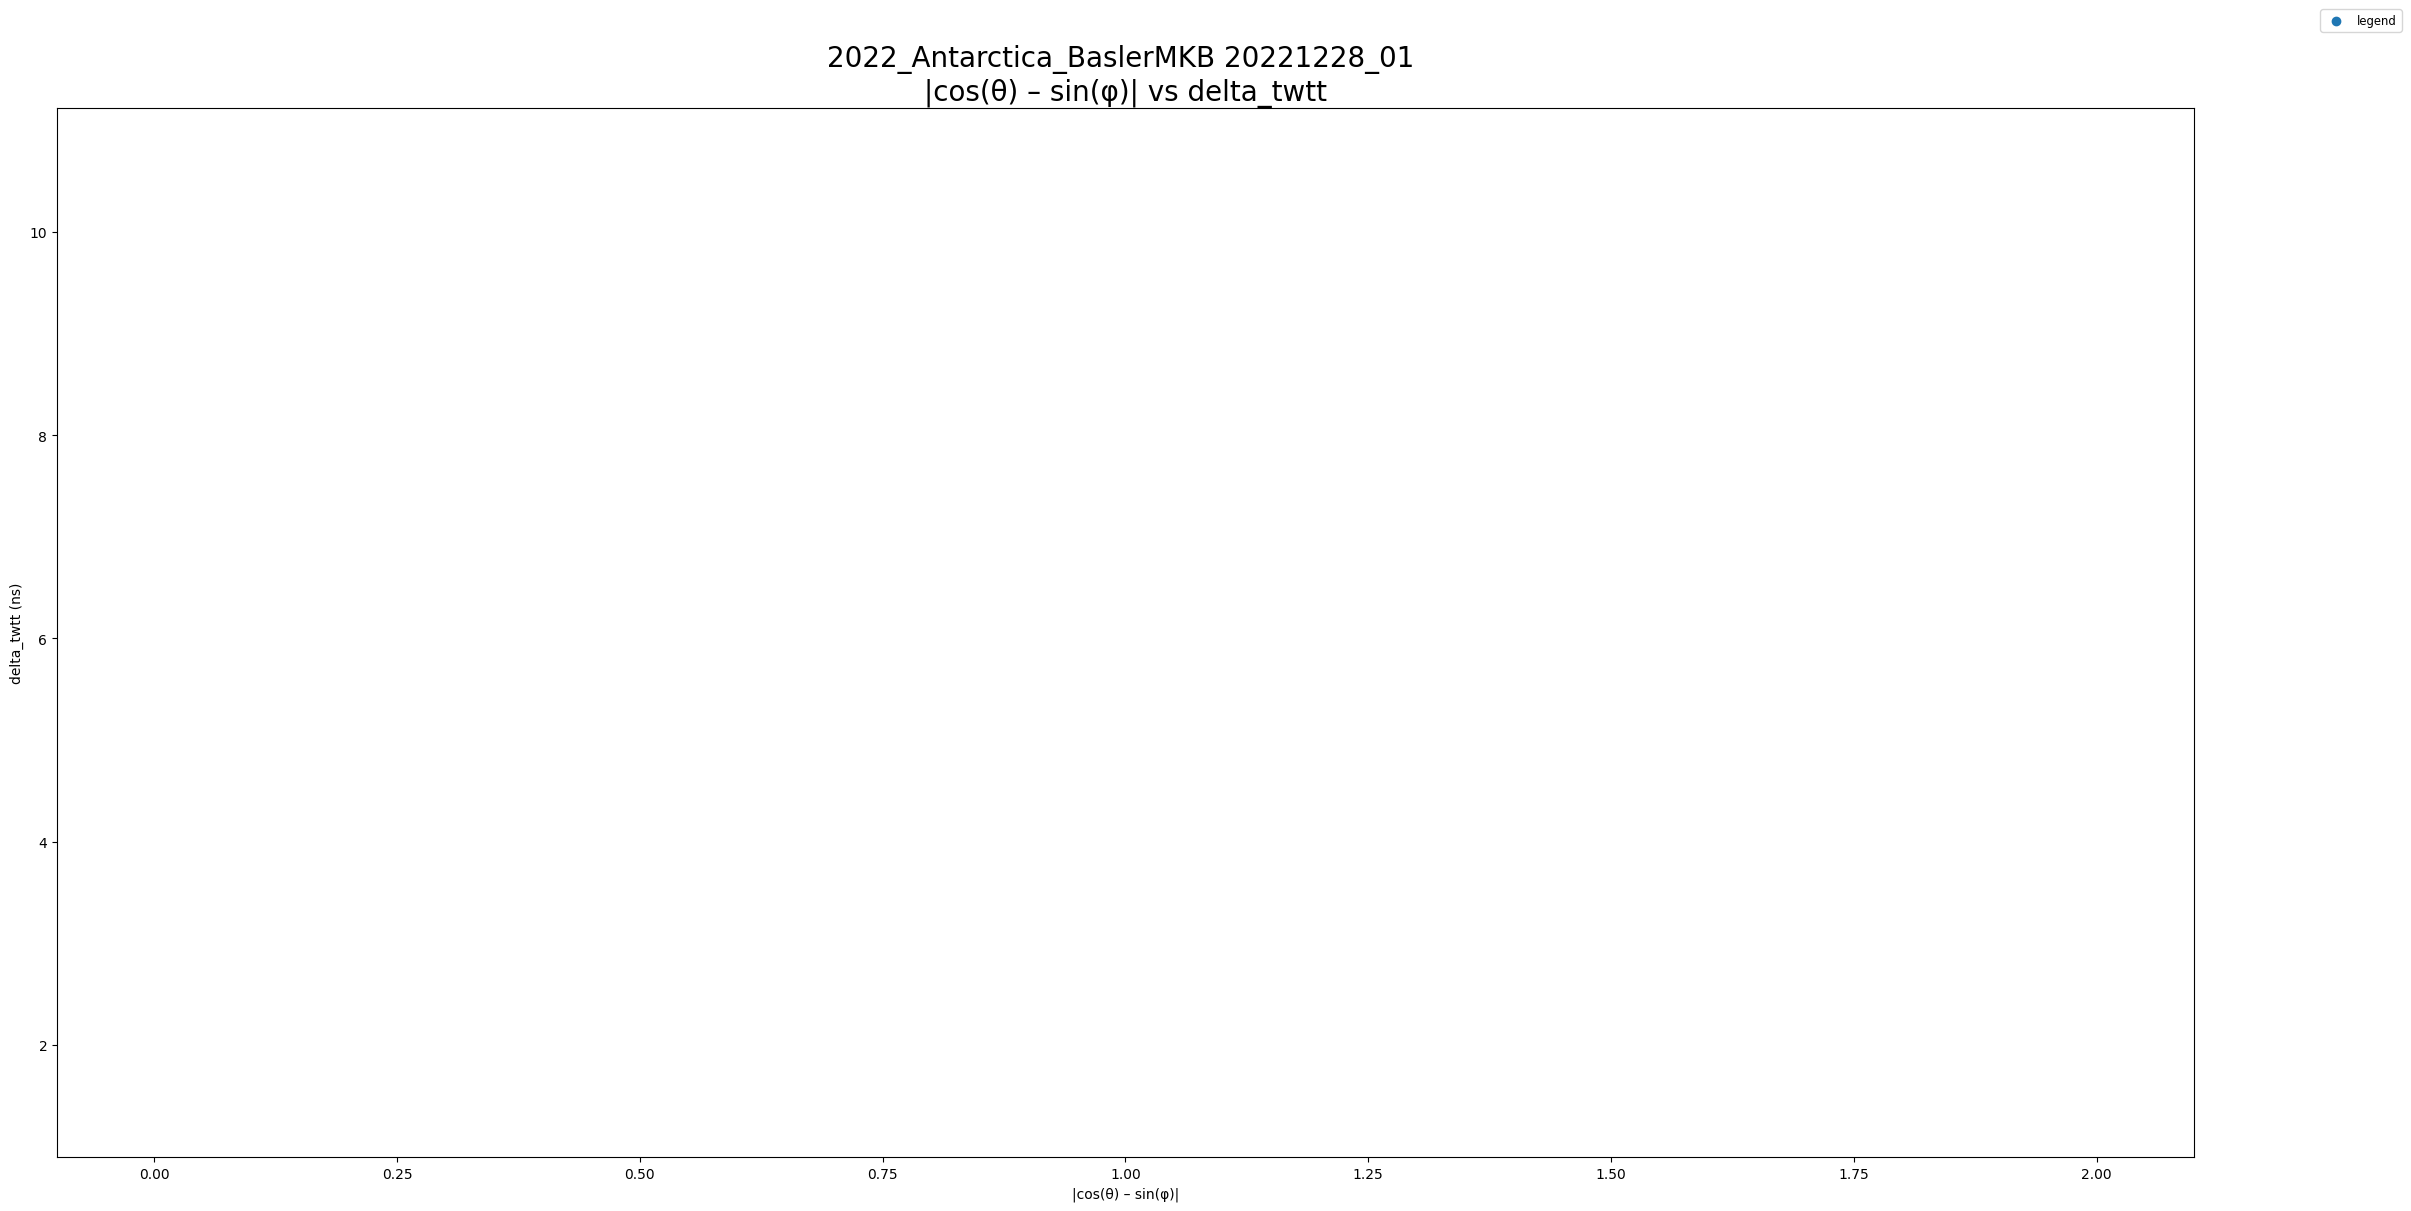

saved plot as C:\Users\rj\Documents\cresis_project\screens\2022_Antarctica_BaslerMKB_20221228_01_cos_angle_heading_vs_delta_twtt.png


In [226]:
plt.figure(figsize=(24, 12), layout='constrained')
xdata = []
ydata = []



plt.scatter(xdata,ydata)

plt.xlabel("|cos(θ) – sin(φ)|")
plt.title(f"{season} {flight} \n|cos(θ) – sin(φ)| vs delta_twtt", fontsize=20)
# get the current directory
dir = os.getcwd()

plt.ylabel("delta_twtt (ns)")
plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.yscale('log')
    
# print(f"abs(max(delta_twtt)): {abs(max(delta_twtt))}")
# set the x bounds to -0.1 to 2.1
plt.xlim(-0.1, 2.1)


plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)


plt.yscale('linear')
# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_lineary.png", dpi=300)
plt.show()

print(f"saved plot as {dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt.png")

Using nanoseconds


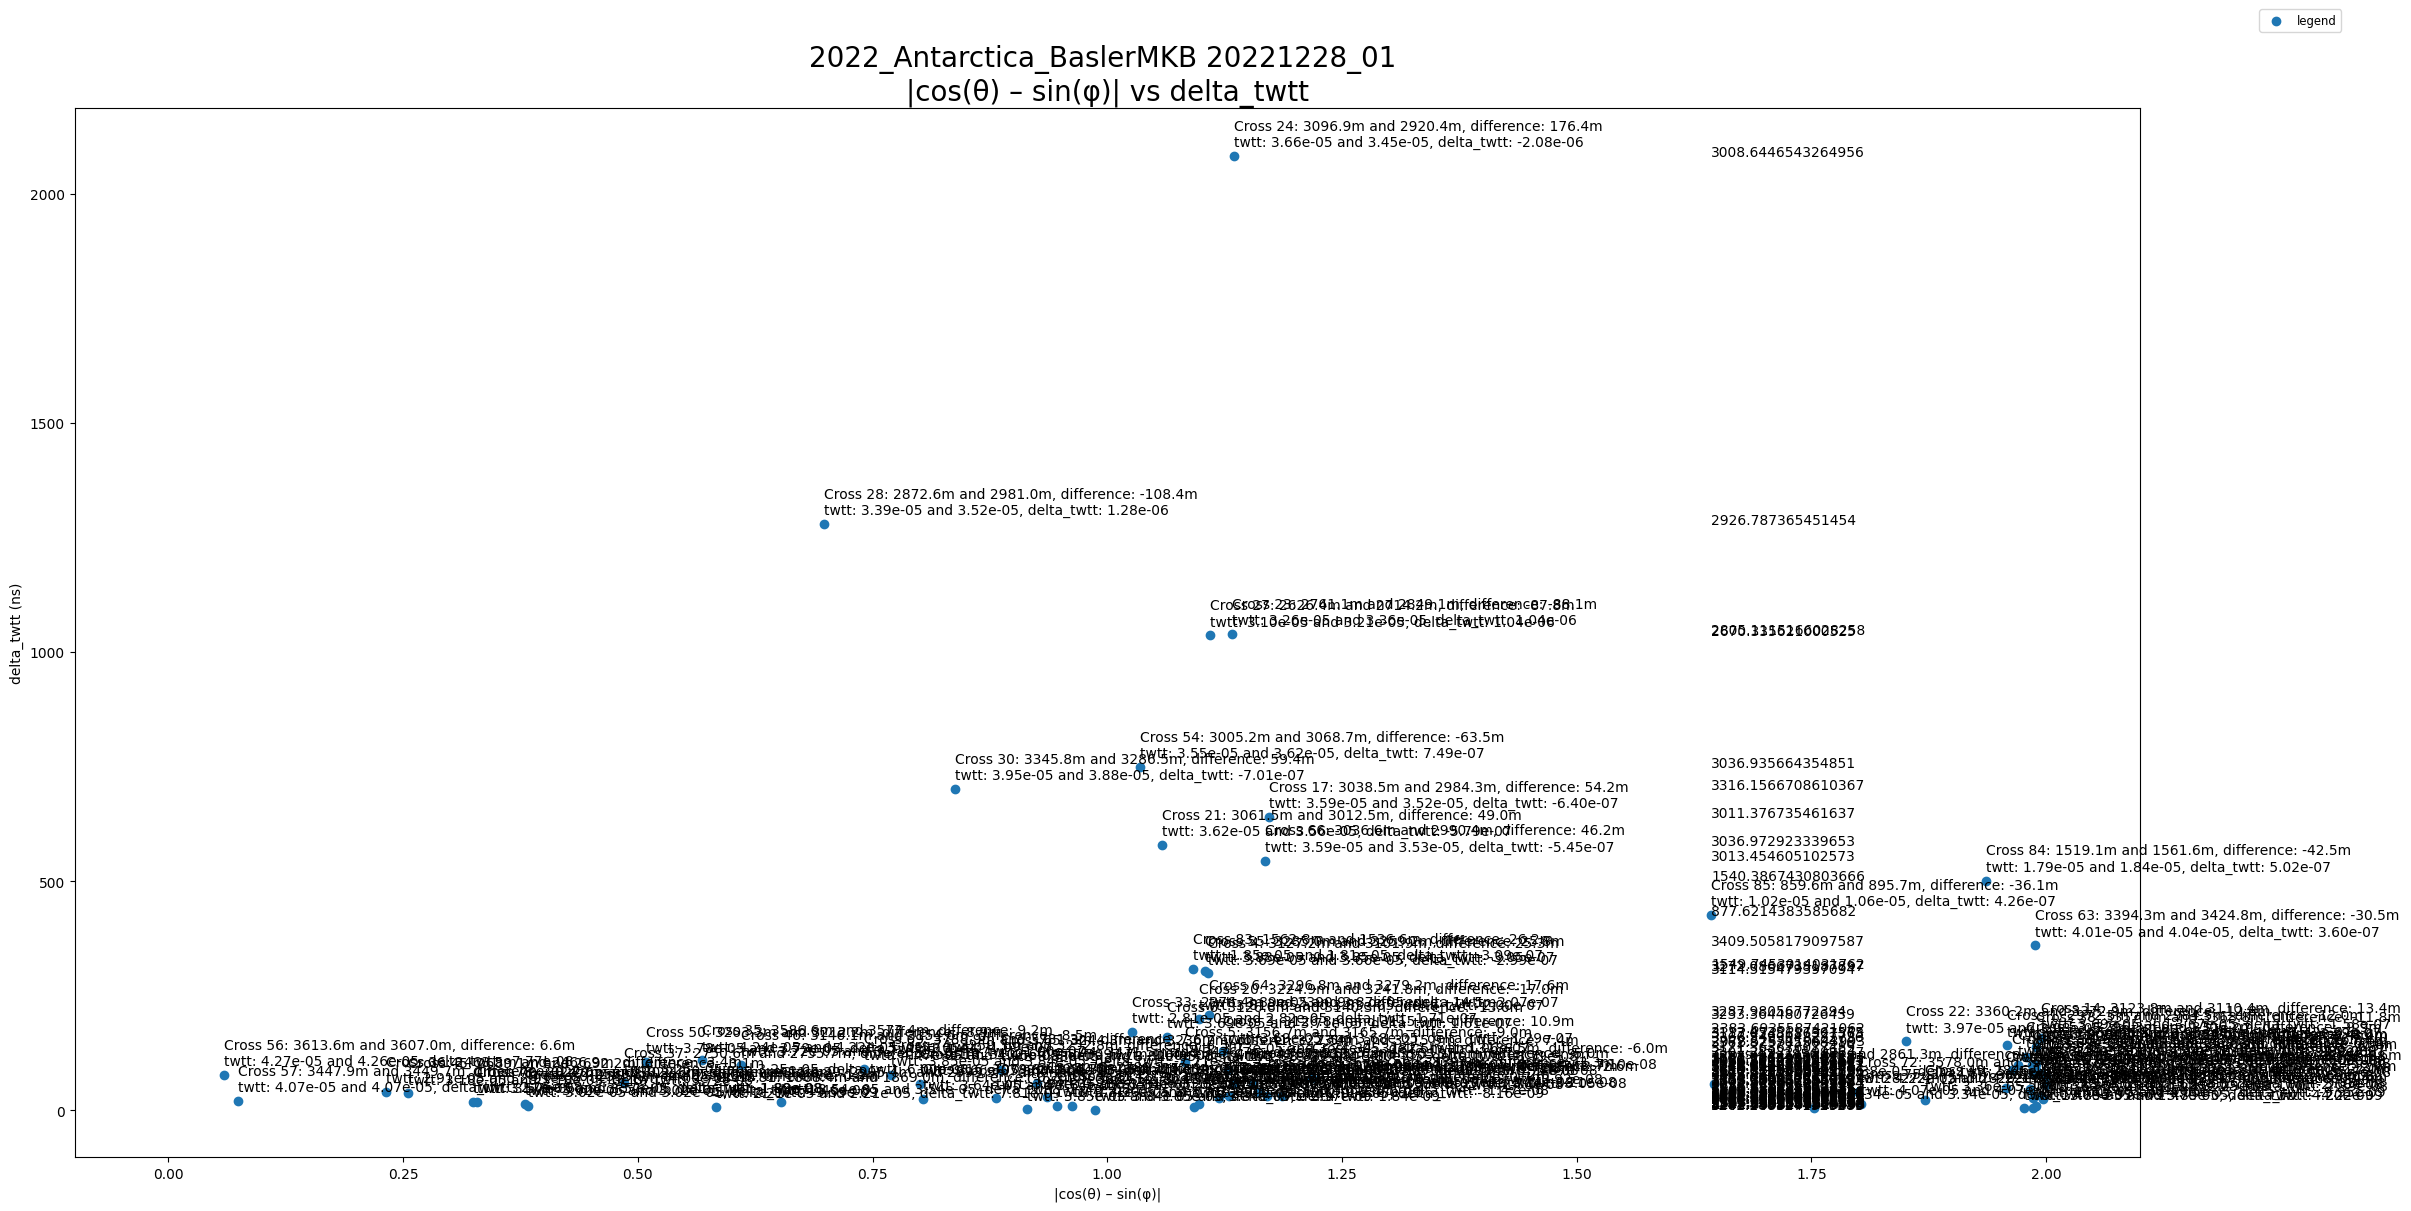

saved plot as C:\Users\rj\Documents\cresis_project\screens\2022_Antarctica_BaslerMKB_20221228_01_cos_angle_heading_vs_delta_twtt.png


In [225]:
"""
Delete and start over?
"""

micro = False
print_time = True

plt.figure(figsize=(24, 12), layout='constrained')
xdata = []
ydata = []

for i in range(len(cross_points)):
    if math.isnan(cross_points[i].delta_twtt):
        debug_print(f"skipping index {i} because delta_twtt is nan")
        continue
    theta = cross_points[i].angle
    phi = abs(cross_points[i].plane_heading_1 - cross_points[i].plane_heading_2)
    delta_twtt_micros = cross_points[i].delta_twtt * 1e6
    delta_twtt_ns = cross_points[i].delta_twtt * 1e9
        
    xdata = np.append(xdata, np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))))  # |cos(θ) – sin(φ)|
    
    if micro:    
        delta_twtt_unit = delta_twtt_micros  # delta_twtt (µs)
        if print_time: 
            print("Using microseconds")
            print_time = False
    else:
        delta_twtt_unit = delta_twtt_ns  # delta_twtt (ns)
        if print_time: 
            print("Using nanoseconds")
            print_time = False
            
    ydata = np.append(ydata, delta_twtt_unit)

y_label_offset = max(ydata) * .01
for i in range(len(xdata)):
    if math.isnan(xdata[i]):
        debug_print(f"skipping index {i} because xdata is nan")
        continue
    if math.isnan(ydata[i]):
        debug_print(f"skipping index {i} because ydata is nan")
        continue
    # plt.text(xdata[index], ydata[index] + y_label_offset, f"Cross {index+1}: {depth[index]:.1f}m", fontsize=10)
    plt.text(xdata[i], ydata[i] + y_label_offset, f"Cross {i+1}: {cross_points[i].depth1:.1f}m and {cross_points[i].depth2:.1f}m, difference: {cross_points[i].depth1 - cross_points[i].depth2:.1f}m\ntwtt: {cross_points[i].twtt[0]:.2e} and {cross_points[i].twtt[1]:.2e}, delta_twtt: {cross_points[i].twtt[1] - cross_points[i].twtt[0]:.2e}", fontsize=10)
    plt.text(np.abs(np.cos(np.radians(theta)) - np.sin(np.radians(phi))), ydata[i], f"{cross_points[i].depth_ave}", fontsize=10)

        
# print(f"xdata: {xdata}")
plt.scatter(xdata,ydata)


plt.xlabel("|cos(θ) – sin(φ)|")

plt.title(f"{season} {flight} \n|cos(θ) – sin(φ)| vs delta_twtt", fontsize=20)


# get the current directory
dir = os.getcwd()

plt.ylabel("delta_twtt (ns)")

    
plt.legend(["legend"], fontsize='smaller', loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.yscale('log')
    
# print(f"abs(max(delta_twtt)): {abs(max(delta_twtt))}")
# set the x bounds to -0.1 to 2.1
plt.xlim(-0.1, 2.1)


plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_logy.png", dpi=300)


plt.yscale('linear')
# save the plot as a png file with a high dpi named after the season and flight
plt.savefig(f"{dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt_lineary.png", dpi=300)
plt.show()

print(f"saved plot as {dir}\\screens\\{season}_{flight}_cos_angle_heading_vs_delta_twtt.png")
# |cos(90) - sin(90)| = 0 - 1 = 1
# plot should peak either at 1 or 0 depending on which flight is closer to the flow vector
    # in theory it should be around 1 but it could be 0 if coded wrong

# END OF RELEVANT CODE FOR ARA TALK

In [20]:
# x_data = np.abs(np.cos(np.radians(np.array(angle) - np.array(heading_1))))
# y_data = delta_twtt
# 
# # Define the Gaussian function
# def gaussian(x, amplitude, mean, stddev):
#     return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))
# 
# # Initial parameter guesses: amplitude close to your data's scale, mean around the center, and a reasonable stddev
# initial_guesses = [1e-8, 0.5, 0.1]
# 
# # Use curve_fit to fit the Gaussian function to your data
# popt, pcov = opt.curve_fit(gaussian, x_data, y_data, p0=initial_guesses, maxfev=5000)
# 
# # Plot the original data
# plt.scatter(x_data, y_data, label='Data')
# 
# # Plot the fitted curve
# x_fit = np.linspace(min(x_data), max(x_data), 1000)
# y_fit = gaussian(x_fit, *popt)
# plt.plot(x_fit, y_fit, color='red', label='Fitted curve')
# 
# plt.xlabel('X axis')
# plt.ylabel('Y axis')
# plt.title('Gaussian Fit to Data')
# plt.legend()
# plt.show()

ntuple-ize
    cos(heading-flow)
    difference in theta paralell and perpindicular
    delta_twtt
    v_flow
- stop selecting for angle in upper cells, we can cut the data once we have it
